In [2]:
house <- read.csv('house_rental.csv.txt')

In [4]:
fit <- lm(Price ~ Sqft + Floor + TotalFloor  + Bedroom + Living.Room + Bathroom, data=house)

In [5]:
summary(fit)


Call:
lm(formula = Price ~ Sqft + Floor + TotalFloor + Bedroom + Living.Room + 
    Bathroom, data = house)

Residuals:
   Min     1Q Median     3Q    Max 
-71429 -11314  -2075   8480 104063 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2669.268   3665.690   0.728    0.467    
Sqft           37.884      1.615  23.456  < 2e-16 ***
Floor        1025.887    241.543   4.247 2.49e-05 ***
TotalFloor    135.451    197.033   0.687    0.492    
Bedroom     -1775.956   1079.401  -1.645    0.100    
Living.Room -3368.837   2078.469  -1.621    0.106    
Bathroom     2777.701   1835.922   1.513    0.131    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19560 on 638 degrees of freedom
Multiple R-squared:  0.7015,	Adjusted R-squared:  0.6987 
F-statistic: 249.9 on 6 and 638 DF,  p-value: < 2.2e-16


In [6]:
predict(fit, house[1:3,])

1        2        3 
45550.75 81335.21 44368.01

#### Selecting the best-fitted regression model with stepwise regression

In [7]:
step(fit, direction="backward")

Start:  AIC=12753.77
Price ~ Sqft + Floor + TotalFloor + Bedroom + Living.Room + Bathroom

              Df  Sum of Sq        RSS   AIC
- TotalFloor   1 1.8081e+08 2.4428e+11 12752
<none>                      2.4410e+11 12754
- Bathroom     1 8.7580e+08 2.4497e+11 12754
- Living.Room  1 1.0051e+09 2.4510e+11 12754
- Bedroom      1 1.0357e+09 2.4513e+11 12754
- Floor        1 6.9016e+09 2.5100e+11 12770
- Sqft         1 2.1050e+11 4.5459e+11 13153

Step:  AIC=12752.25
Price ~ Sqft + Floor + Bedroom + Living.Room + Bathroom

              Df  Sum of Sq        RSS   AIC
<none>                      2.4428e+11 12752
- Bathroom     1 8.1619e+08 2.4509e+11 12752
- Living.Room  1 1.0233e+09 2.4530e+11 12753
- Bedroom      1 1.1225e+09 2.4540e+11 12753
- Floor        1 1.1700e+10 2.5598e+11 12780
- Sqft         1 2.3530e+11 4.7958e+11 13185



Call:
lm(formula = Price ~ Sqft + Floor + Bedroom + Living.Room + Bathroom, 
    data = house)

Coefficients:
(Intercept)         Sqft        Floor      Bedroom  Living.Room     Bathroom  
    3522.17        38.22      1116.95     -1841.61     -3398.44      2672.11  


### Applying the Gaussian model for generalized linear regression

In [11]:
glmfit <- glm(Price ~ Sqft + Floor + TotalFloor  + Bedroom + Living.Room + Bathroom, data=house, family=gaussian())

In [14]:
#Comparision of two plotted models
#Res.Df - same so, both the models are same
anova(fit,glmfit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
638,244096157328,NA,NA,NA,NA
638,244096157328,0,-9.155273e-05,NA,NA


In [15]:
customer = read.csv('customer.csv', header=TRUE)

In [16]:
customer

CustomerID,gender,age,visit.times,buy
1,F,36,5,yes
2,M,26,3,no
3,F,21,2,yes
4,F,49,5,yes
5,M,42,4,no
6,M,49,1,no
7,F,47,4,yes
8,F,50,1,no
9,M,26,2,no
10,M,40,3,no


In [17]:
logitfit = glm(buy ~ visit.times + age + gender, data=customer, family=binomial(logit))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [19]:
summary(logitfit)


Call:
glm(formula = buy ~ visit.times + age + gender, family = binomial(logit), 
    data = customer)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.909   0.000   0.000   0.000   1.245  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)   26.5278    18.6925   1.419    0.156
visit.times    9.7809     6.1264   1.597    0.110
age           -1.1396     0.7592  -1.501    0.133
genderM      -71.0222  4170.8348  -0.017    0.986

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 133.7496  on 99  degrees of freedom
Residual deviance:   7.1936  on 96  degrees of freedom
AIC: 15.194

Number of Fisher Scoring iterations: 21


In [22]:
customer

CustomerID,gender,age,visit.times,buy
1,F,36,5,yes
2,M,26,3,no
3,F,21,2,yes
4,F,49,5,yes
5,M,42,4,no
6,M,49,1,no
7,F,47,4,yes
8,F,50,1,no
9,M,26,2,no
10,M,40,3,no


In [26]:
pr <- predict(logitfit, customer, type="response")

In [27]:
table(customer$buy, ifelse(pr > 0.5, 'yes', 'no'))

     
      no yes
  no  60   1
  yes  1  38

In [28]:
library(rpart)

In [29]:
#seed - controls random number generation
#sample - generating random numbers
set.seed(33)
idx <- sample(c(1,2),nrow(customer),prob = c(0.8,0.2), replace=TRUE)
trainset <- customer[idx == 1, ]
testset  <- customer[idx == 2, ]

In [31]:
#rpart - to trains the learning model
fit <- rpart(buy ~ gender + age + visit.times, data = trainset)

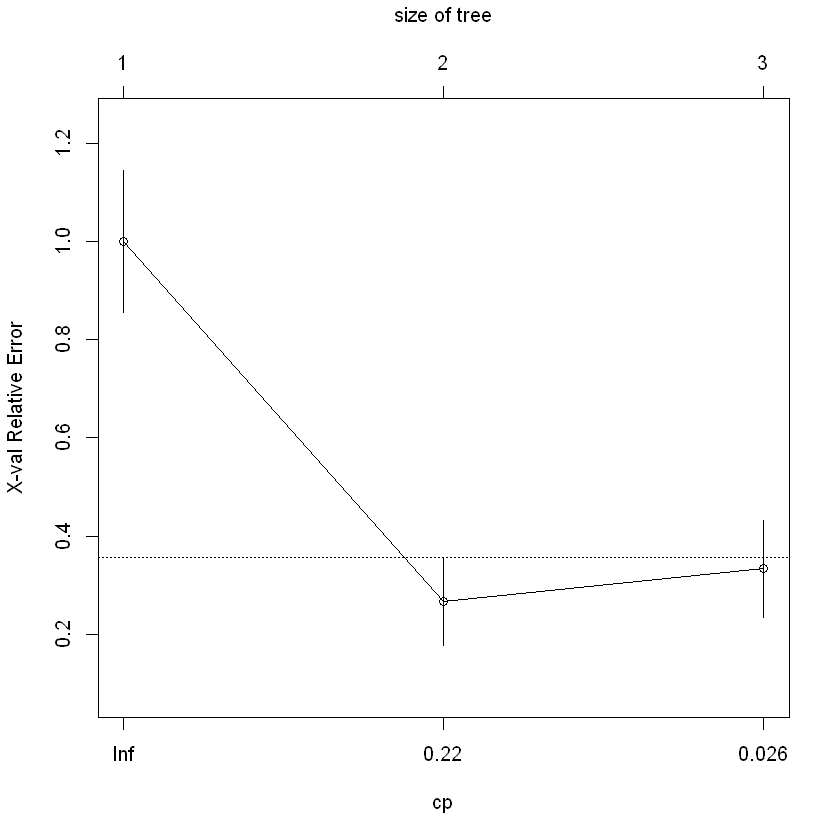

In [32]:
plotcp(fit)

In [33]:
?rpart

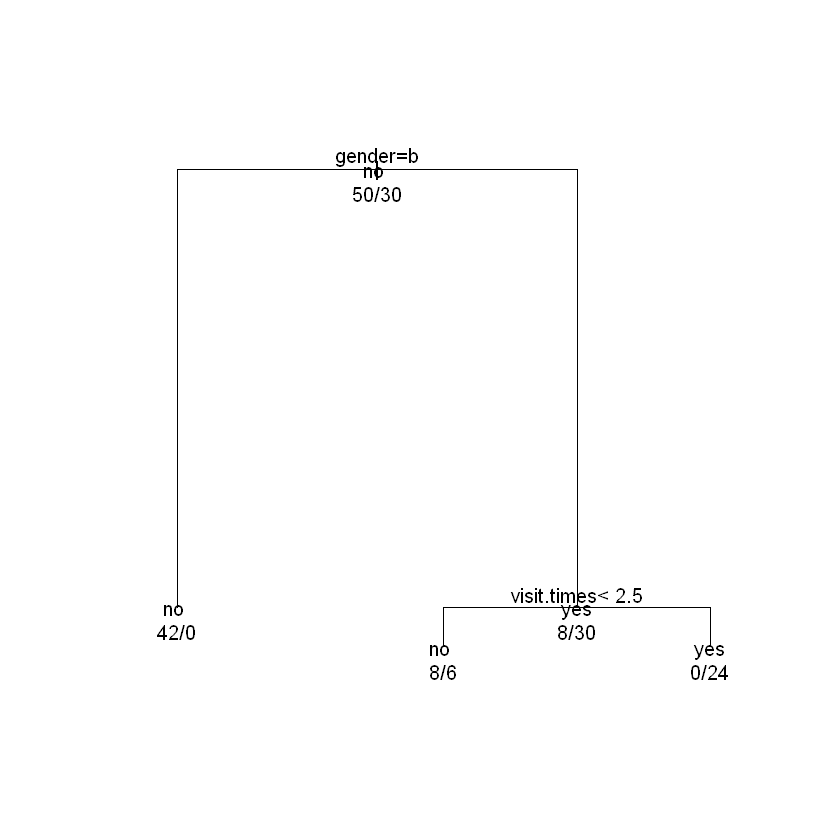

In [35]:
plot(fit, margin= 0.1)
text(fit, all=TRUE, use.n = TRUE)